In [9]:
import numpy as np
import pandas as pd
from PIL import Image # 이미지를 불러오기 위한 라이브러리
import matplotlib.pyplot as plt # 그림을 표시하기 위한 라이브러리
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

train_data = pd.read_csv('train/train_data.csv')
train_data

,file_name,label
0,train0001.png,8
1,train0002.png,8
2,train0003.png,8
3,train0004.png,8
4,train0005.png,8
...,...,...
4995,train4996.png,6
4996,train4997.png,6
4997,train4998.png,6
4998,train4999.png,6


In [16]:
train_file_name= train_data['file_name']
train_label = train_data['label']

train_image=[]
for file in train_file_name:
    train_image.append(Image.open("train/"+file))

In [ ]:
train_image

In [24]:
# 랜덤으로 9개를 뽑아서 이미지를 표시해봅시다.
random_images = np.random.permutation(train_image)[:9] 

plt.style.use('ggplot')
fig, ax = plt.subplots(3,3, figsize=(15,15))
fig.suptitle("Random Digits", fontsize=40)
for i in range(1,10):
    plt.subplot(3,3,i)
    plt.imshow(random_images[i-1])
plt.show()

TypeError: int() argument must be a string, a bytes-like object or a number, not 'PngImageFile'

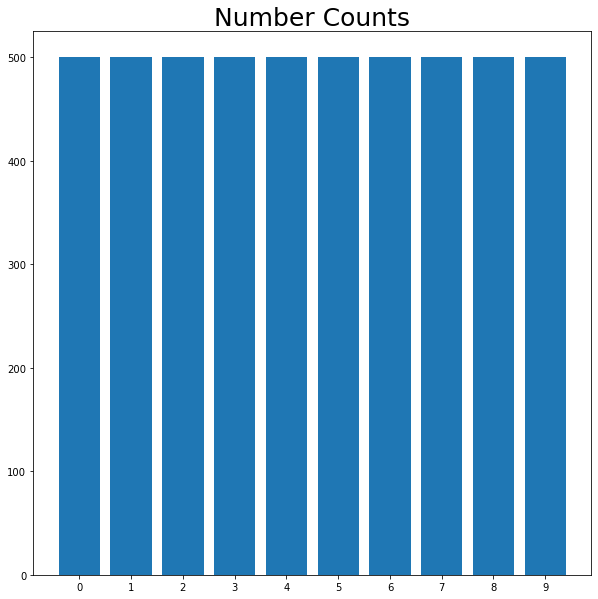

숫자 0 의 개수는 500개 입니다.
숫자 1 의 개수는 500개 입니다.
숫자 2 의 개수는 500개 입니다.
숫자 3 의 개수는 500개 입니다.
숫자 4 의 개수는 500개 입니다.
숫자 5 의 개수는 500개 입니다.
숫자 6 의 개수는 500개 입니다.
숫자 7 의 개수는 500개 입니다.
숫자 8 의 개수는 500개 입니다.
숫자 9 의 개수는 500개 입니다.


In [20]:
from collections import Counter
label_counter =Counter(train_label)

plt.figure(figsize=(10,10))
plt.title("Number Counts", fontsize=25)
plt.bar(x=list(label_counter.keys()), height =list(label_counter.values()))
plt.xticks(list(range(10)))
plt.show()

for i in range(10):
    print(f"숫자 {i} 의 개수는 {label_counter[i]}개 입니다.")

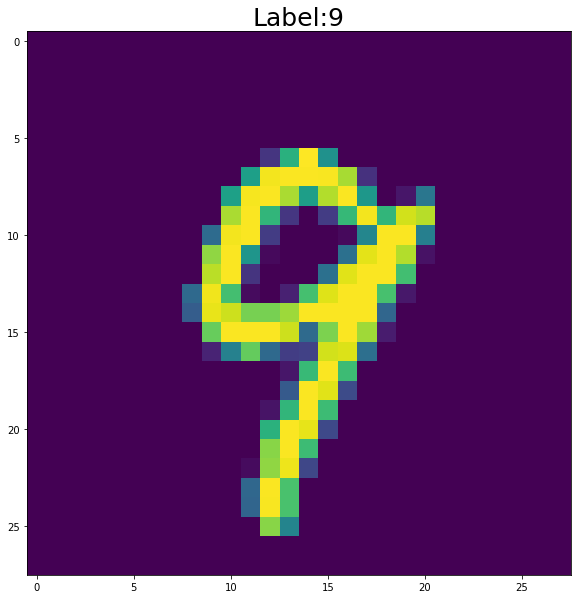

In [23]:
image, label = train_image[77], train_label[77]

plt.figure(figsize=(10,10))
plt.imshow(image)
plt.title('Label:'+str(label), fontsize=25)
plt.show()

In [26]:
image =np.array(image)

print('이미지의 사이즈:', image.shape)
print('이미지의 최소, 최대값:', image.min(), image.max())
print('이미지의 유의미한 pixel 개수:', (image>0).sum())

이미지의 사이즈: (28, 28)
이미지의 최소, 최대값: 0 254
이미지의 유의미한 pixel 개수: 129


In [33]:
# 먼저 이미지 전체를 np.array 형태로 변환
# 또한 분석의 편의성을 위해서 flatten() 메소드를 사용해서 28 x 28 이미지를 28*28=748 array로

image2number= np.array([np.array(image).flatten() for image in train_image])

print("이미지의 최소, 최대 값 : ", image2number.min(), image2number.max())
print("이미지의 유의미한 pixel 개수 평균 : ", (image2number > 0).sum()/len(image2number))

이미지의 최소, 최대 값 :  0 255
이미지의 유의미한 pixel 개수 평균 :  151.1304


In [32]:
image_dict={}
for i in range(10):
    idx =train_label[train_label==i].index
    image_dict[i] =image2number[idx]


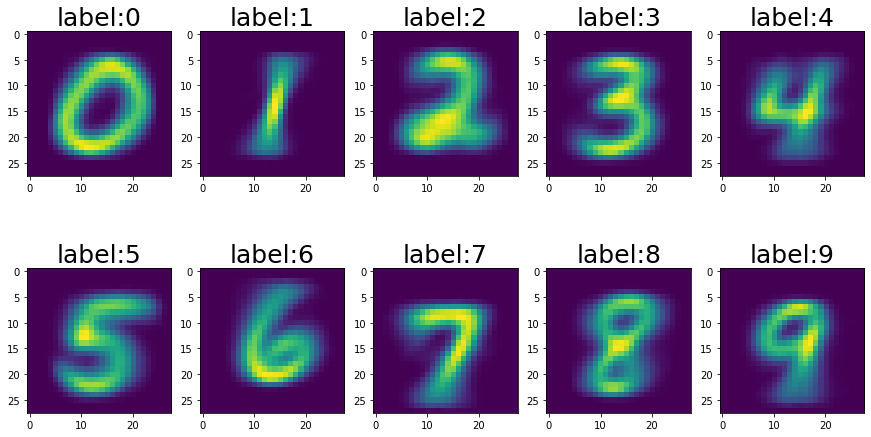

In [38]:
plt.figure(figsize=(15,8))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.grid(False)
    plt.title('label:'+str(i), fontsize=25)
    plt.imshow(image_dict[i].sum(axis=0).reshape(28,28))
plt.show()

In [39]:
from sklearn.manifold import TSNE

# 3~5분 정도 걸려요!
image_tsne = TSNE(n_components=2).fit_transform(image2number)

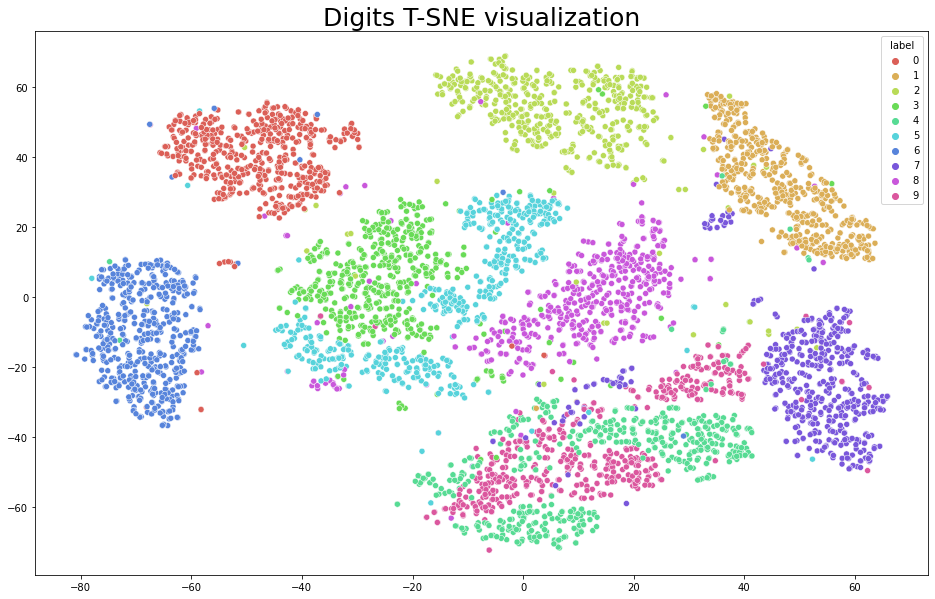

In [40]:
import seaborn as sns

plt.figure(figsize=(16,10))
plt.title("Digits T-SNE visualization", fontsize=25)
sns.scatterplot(
    x=image_tsne[:,0], y=image_tsne[:,1],
    hue=train_label,
    palette=sns.color_palette("hls", 10),
    legend="full"
)
plt.show()